In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from matplotlib  import rcParams

%matplotlib inline 

In [2]:
%matplotlib inline
rcParams["figure.figsize"] = 16,6
c = '#386B7F'

In [199]:
# upload the bank term deposit data set
data = pd.read_csv("bank-additional/bank-additional-full.csv", sep=';')
# data_2 = pd.read_excel("bank-additional/bank-additional-full-1.csv", low_memory=False)

# Task 1

#### Summery about the data

      1) bank-additional-full.csv with all examples, ordered by date (from May 2008 to November 2010).
      2) bank-additional.csv with 10% of the examples (4119), randomly selected from bank-additional-full.csv.
   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g., SVM).

   The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y).

1. Number of Instances: 41188 for bank-additional-full.csv

2. Number of Attributes: 20 + output attribute.
3. **Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.** 
4. Attribute information:


   1. **bank client data:**
   
   1- age (numeric)
   
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   
   5 - default: has credit in default? (categorical: "no","yes","unknown")
   
   6 - housing: has housing loan? (categorical: "no","yes","unknown")
   
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   2. **related with the last contact of the current campaign:**
   
   8 - contact: contact communication type (categorical: "cellular","telephone") 
   
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   
   10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
   
   11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   3. **other attributes:**
   
   12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
   13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
   
   14 - previous: number of contacts performed before this campaign and for this client (numeric)
   
   15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   4. **social and economic context attributes**
   
   16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
   
   17 - cons.price.idx: consumer price index - monthly indicator (numeric)    
   
   18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)  
   
   19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
   
   20 - nr.employed: number of employees - quarterly indicator (numeric)

   5. Output variable (desired target):
   
   21 - y - has the client subscribed a term deposit? (binary: "yes","no")




### Data Glance

In [200]:
#glance the data
print("shape of the  store data: ",data.shape)
print("\n unique no of each variable\n")
print(data.nunique())
print("\n--------data summery------------\n")
print(data.info())
data.sample(10)

shape of the  store data:  (41188, 21)

 unique no of each variable

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

--------data summery------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
21714,31,admin.,single,high.school,unknown,yes,no,cellular,aug,tue,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
22581,39,admin.,married,university.degree,no,no,no,cellular,aug,fri,...,4,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
39670,30,admin.,single,high.school,no,yes,no,cellular,may,fri,...,5,999,0,nonexistent,-1.8,93.876,-40.0,0.684,5008.7,yes
40714,84,retired,divorced,unknown,unknown,no,no,cellular,sep,tue,...,1,3,2,success,-1.1,94.199,-37.5,0.877,4963.6,yes
19512,41,admin.,single,university.degree,unknown,yes,no,cellular,aug,thu,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,yes
29368,36,admin.,single,high.school,no,no,no,cellular,apr,fri,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
5854,38,admin.,married,university.degree,no,no,no,telephone,may,mon,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6759,34,blue-collar,divorced,professional.course,no,unknown,unknown,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
39597,27,student,married,high.school,no,yes,no,telephone,may,wed,...,1,999,0,nonexistent,-1.8,93.876,-40.0,0.672,5008.7,no
17315,44,blue-collar,married,basic.9y,no,no,no,cellular,jul,fri,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no


### Treat missing value

- **Missing Attribute Values:** There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.

In [201]:
cat_col = data.select_dtypes(exclude=['int64', 'float64']).columns #catagorical columns
non_cat_col = data.select_dtypes(include=['int64', 'float64']).columns # non catagorical variable
new_data =data[cat_col] 

missing_data = pd.DataFrame(new_data[new_data[cat_col]=="unknown"].count(),columns = ["missing value"]) # missing value count
missing_data.reset_index()


,index,missing value
0,job,330
1,marital,80
2,education,1731
3,default,8597
4,housing,990
5,loan,990
6,contact,0
7,month,0
8,day_of_week,0
9,poutcome,0


In [202]:
# change the unknow to nan value
data[cat_col] = data[cat_col].replace(['unknown', 0], np.nan)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [203]:
# impute missing value
data[cat_col]=data[cat_col].fillna(data.mode().iloc[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Treat outliers

In [204]:
#Dealing with the outlier
#if __name__ == "__main__":

def deal_outliers(data,columns):
#     data[columns].plot(kind = 'box')
    print("\nbefore dealing with the ouliers the shape of the data",
          data.shape)
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)
        data = data[data[col]>lower_bound]
        data = data[data[col]<upper_bound]
#     data[columns].plot(kind = 'box')
    print("after removing the outliers",data.shape)
    return data


before dealing with the ouliers the shape of the data (41188, 21)
after removing the outliers (40719, 21)

before dealing with the ouliers the shape of the data (40719, 21)
after removing the outliers (37784, 21)

before dealing with the ouliers the shape of the data (37784, 21)
after removing the outliers (34634, 21)


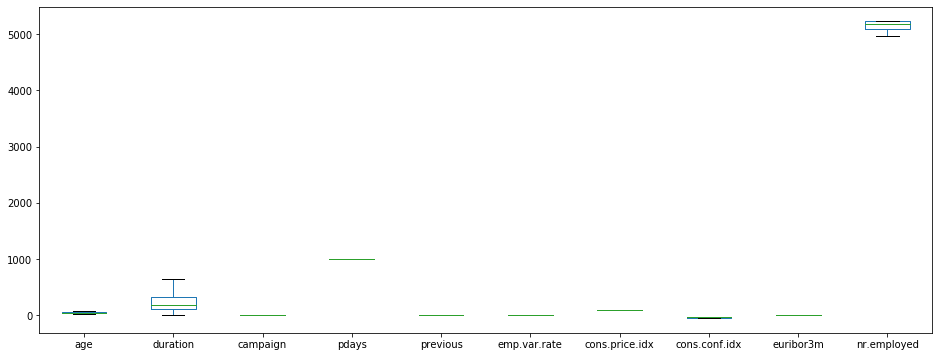

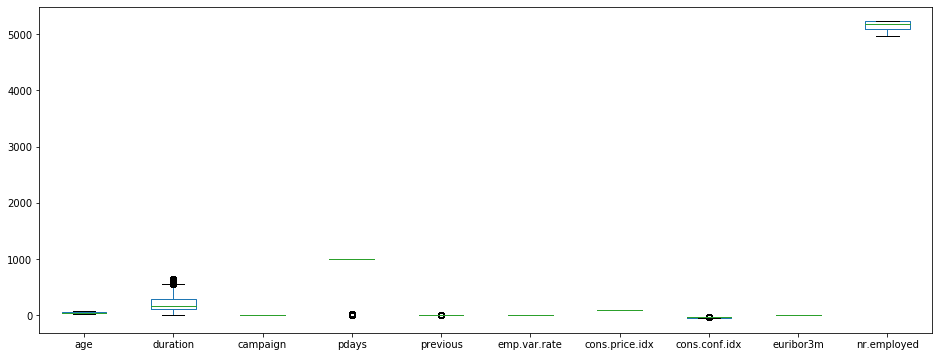

In [205]:
data[data.columns].plot(kind = 'box',showfliers = False)

non_cat_col = ['age', 'duration', 'campaign']

for col in non_cat_col:
    data = deal_outliers(data,[col])
data[data.columns].plot(kind = 'box')
